## **Smoking Drinking Prediction**

**Problem Statement:**  
The goal is to predict smoking and drinking habits based on various health and demographic attributes provided in the dataset. This involves analyzing the relationships between features such as age, gender, physical measurements, and health indicators to determine patterns and build a predictive model for smoking and drinking behavior.

Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same. It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes.

**Smoking Drinking Dataset -->**

#### **Importing Dependencies**

In [40]:
# Libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

# Pre Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## **Data Collection & Data Analysis**

### **Importing Dataset**

In [ ]:
dataset = pd.read_csv('smoking_drinking_dataset.csv')

In [42]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [43]:
dataset.shape

(49999, 24)

In [44]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

#### **Rename Columns for Clarity**

In [45]:
dataset.rename(columns={
    'sex': 'gender',
    'waistline': 'waist_cm',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'sight_left': 'vision_left',
    'sight_right': 'vision_right',
    'SBP': 'systolic_bp',
    'DBP': 'diastolic_bp',
    'BLDS': 'blood_sugar',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'hdl_cholesterol',
    'LDL_chole': 'ldl_cholesterol',
    'triglyceride': 'triglycerides',
    'Urine_protein': 'urine_protein',
    'serum_creatinine': 'creatinine',
    'AST': 'liver_ast',
    'ALT': 'liver_alt',
    'gamma_GTP': 'gamma_gtp',
    'SMK_stat_type_cd': 'smoking_status',
    'DRK_YN': 'is_drinker'
}, inplace=True)

In [46]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N


#### **Checking Null Values**

In [47]:
print("Missing values:\n", dataset.isnull().sum())

Missing values:
 gender               0
age                  0
height_cm            0
weight_kg            0
waist_cm             0
vision_left          0
vision_right         0
hear_left            0
hear_right           0
systolic_bp          0
diastolic_bp         0
blood_sugar          0
total_cholesterol    0
hdl_cholesterol      0
ldl_cholesterol      0
triglycerides        0
hemoglobin           0
urine_protein        0
creatinine           0
SGOT_AST             0
SGOT_ALT             0
gamma_gtp            0
smoking_status       0
is_drinker           0
dtype: int64


#### **Checking Duplicated Values**

In [48]:
dataset[dataset.duplicated()]

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker


### **Visualizing the Data**

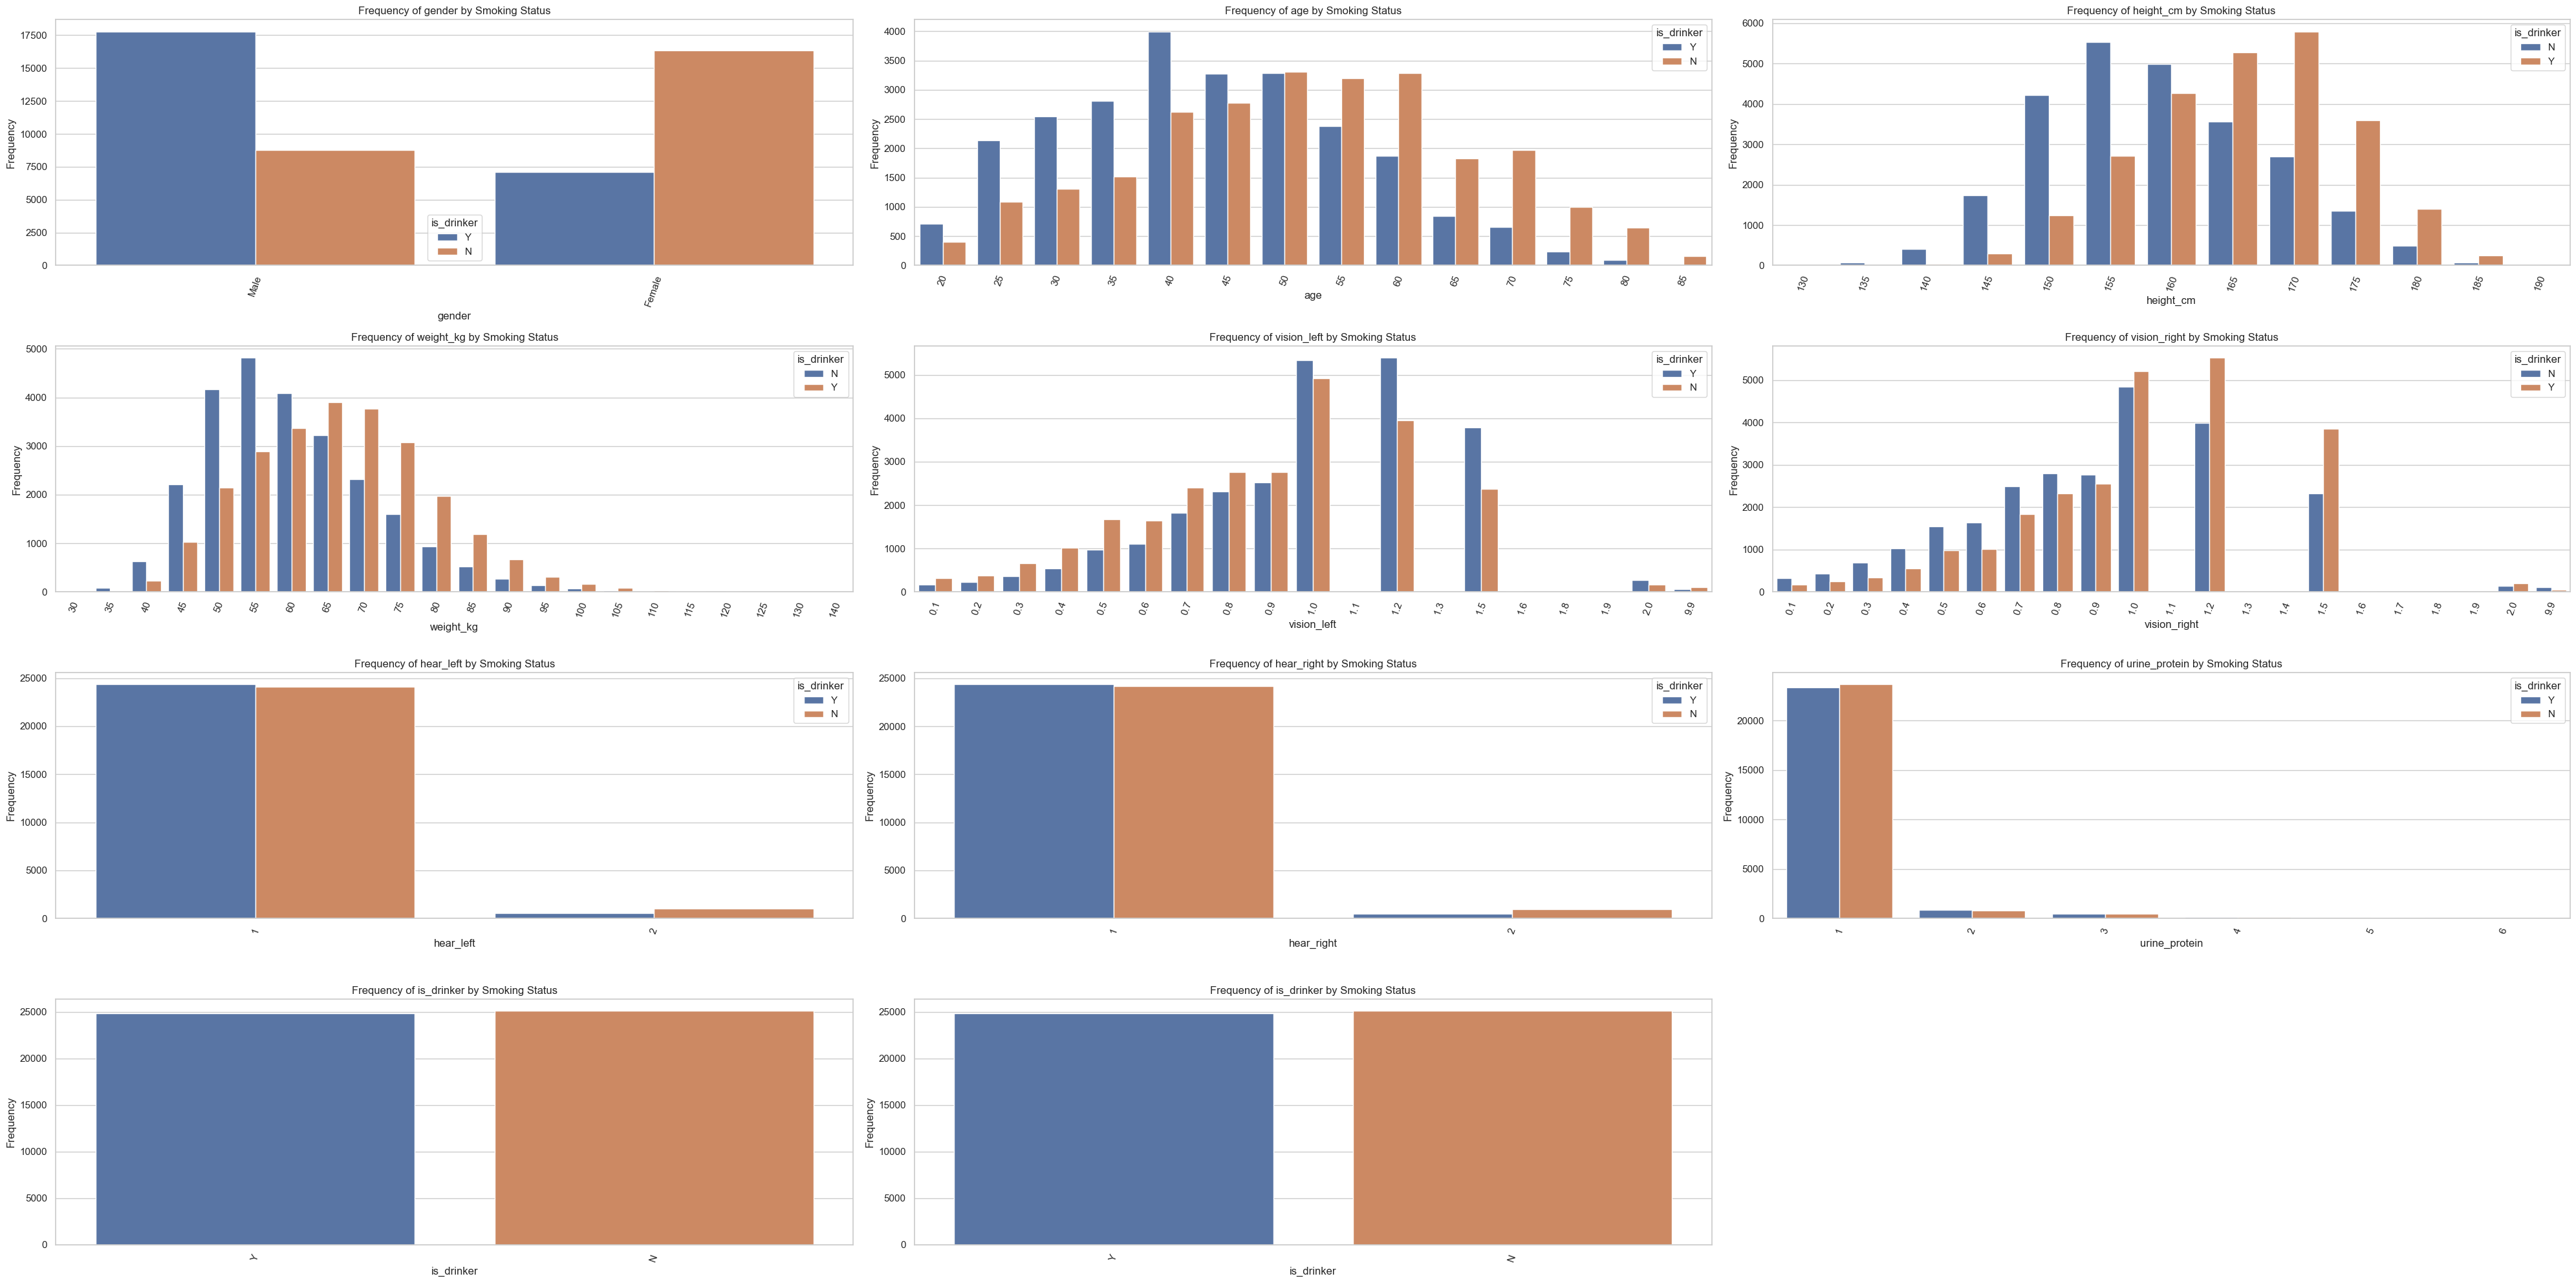

In [49]:
# current_y_is_smoking_or_drinking = 'smoking_status'
currently_is_smoking_or_drinking = 'is_drinker'

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

for idx, column in enumerate(['gender', 'age', 'height_cm', 'weight_kg', 'vision_left', 'vision_right', 'hear_left', 'hear_right',
                              "urine_protein", currently_is_smoking_or_drinking, "is_drinker"], start=1):

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=dataset , hue=currently_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

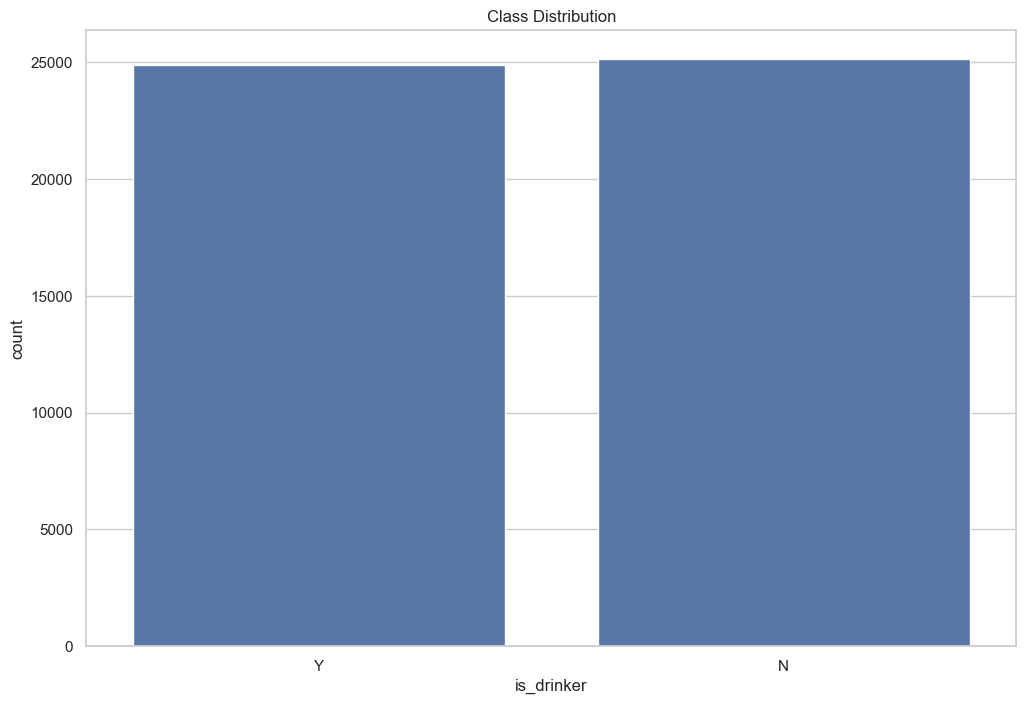

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x='is_drinker', data=dataset)
plt.title('Class Distribution')
plt.show()

#### **Removing Ineffective Columns**

In [51]:
dataset.groupby('smoking_status').mean(numeric_only=True)

,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp
smoking_status,,,,,,,,,,,,,,,,,,,,,
1,48.364920,158.535258,59.235133,78.949510,0.950225,0.941546,1.030595,1.030727,121.142985,74.912582,98.552061,195.616392,59.573560,113.803069,114.709202,13.634031,1.089568,0.802269,24.700139,22.898624,27.356221
2,50.159311,167.304661,69.228777,85.218858,1.022551,1.022731,1.041207,1.036478,125.350034,78.059896,104.034114,194.606958,53.839563,112.584440,147.149741,14.959029,1.114163,0.964524,28.111124,29.840126,46.071043
3,43.303777,168.425985,69.532298,84.273913,1.041376,1.052899,1.022512,1.020123,123.606267,77.589360,103.119085,196.559313,52.822384,112.028393,168.585133,15.277773,1.103005,0.934513,27.566204,30.191308,55.308738


In [52]:
dataset.drop(['hear_left', 'hear_right', 'urine_protein'], axis=1, inplace=True)

### **Feature Transformation**

In [53]:
# BMI = weight(kg) / (height(m)^2)
dataset['BMI'] = dataset['weight_kg'] / ((dataset['height_cm'] / 100) ** 2)

conditions = [
    (dataset['BMI'] < 18.5),
    (dataset['BMI'] >= 18.5) & (dataset['BMI'] < 25),
    (dataset['BMI'] >= 25) & (dataset['BMI'] < 30),
    (dataset['BMI'] >= 30)
]

# labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
dataset['BMI_Category'] = pd.cut(dataset['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=['0', '1', '2', '3'])
dataset['BMI_Category'] = dataset['BMI_Category'].astype(int)

In [54]:
# Mean arterial pressure (MAP) = DBP + (SBP - DBP) / 3
dataset['MAP'] = dataset['diastolic_bp'] + (dataset['systolic_bp'] - dataset['diastolic_bp']) / 3

In [55]:
# Liver_Enzyme_Ratio = SGOT_AST / SGOT_ALT
dataset['Liver_Enzyme_Ratio'] = dataset['SGOT_AST'] / dataset['SGOT_ALT']

In [56]:
# Anemia_Indicator if hemoglobin < 12 --> anemia
anemia_threshold = 12
dataset['Anemia_Indicator'] = (dataset['hemoglobin'] < anemia_threshold).astype(int)

In [57]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,BMI,BMI_Category,MAP,Liver_Enzyme_Ratio,Anemia_Indicator
0,Male,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,Y,25.951557,2,93.333333,0.600000,0
1,Male,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,N,24.691358,1,98.000000,0.555556,0
2,Male,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,N,27.548209,2,86.666667,1.468750,0
3,Male,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,N,26.122449,2,106.333333,0.852941,0
4,Male,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,N,22.038567,1,100.666667,1.583333,0


### **Handling Imbalanced Dataset**

In [58]:
dataset['is_drinker'].value_counts() # Dataset already balanced

is_drinker
N    25126
Y    24873
Name: count, dtype: int64

### **Encoding**

In [59]:
le = LabelEncoder()

In [60]:
dataset['gender'] = le.fit_transform(dataset.gender)        # Male=1, Female=0
dataset['is_drinker'] = le.fit_transform(dataset.is_drinker)  # N=0, Y=1 
dataset

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker,BMI,BMI_Category,MAP,Liver_Enzyme_Ratio,Anemia_Indicator
0,1,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,1,25.951557,2,93.333333,0.600000,0
1,1,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,0,24.691358,1,98.000000,0.555556,0
2,1,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,0,27.548209,2,86.666667,1.468750,0
3,1,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,0,26.122449,2,106.333333,0.852941,0
4,1,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,0,22.038567,1,100.666667,1.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0,40,155,50,64.0,0.8,0.8,111,69,81,174,76,83,72,10.4,0.8,19,16,18,1,0,20.811655,1,83.000000,1.187500,1
49995,0,85,140,50,86.2,0.2,0.2,127,86,97,208,31,143,168,9.9,1.8,30,22,20,1,0,25.510204,2,99.666667,1.363636,1
49996,1,25,175,65,74.0,1.2,1.2,117,83,88,226,71,143,60,15.9,1.1,18,16,20,3,1,21.224490,1,94.333333,1.125000,0
49997,1,60,165,65,87.0,0.8,0.8,114,59,91,196,46,119,156,15.1,0.9,27,25,22,2,0,23.875115,1,77.333333,1.080000,0


### **Outlier Treatment**

In [61]:
dataset.dtypes

gender                  int64
age                     int64
height_cm               int64
weight_kg               int64
waist_cm              float64
vision_left           float64
vision_right          float64
systolic_bp             int64
diastolic_bp            int64
blood_sugar             int64
total_cholesterol       int64
hdl_cholesterol         int64
ldl_cholesterol         int64
triglycerides           int64
hemoglobin            float64
creatinine            float64
SGOT_AST                int64
SGOT_ALT                int64
gamma_gtp               int64
smoking_status          int64
is_drinker              int64
BMI                   float64
BMI_Category            int64
MAP                   float64
Liver_Enzyme_Ratio    float64
Anemia_Indicator        int64
dtype: object

In [62]:
original_data = dataset.copy() 

In [63]:
# Apply IQR-based clipping to numerical columns
for col in dataset.columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    dataset[col] = dataset[col].clip(lower=lower, upper=upper)

In [64]:
print("After outlier treatment:")
print(dataset.describe())

After outlier treatment:
             gender           age     height_cm     weight_kg      waist_cm  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.531591     47.582052    162.246145     63.117812     81.144435   
std        0.499006     14.163445      9.299699     12.126292      9.536119   
min        0.000000     20.000000    132.500000     32.500000     53.750000   
25%        0.000000     35.000000    155.000000     55.000000     74.000000   
50%        1.000000     45.000000    160.000000     60.000000     81.000000   
75%        1.000000     60.000000    170.000000     70.000000     87.500000   
max        1.000000     85.000000    190.000000     92.500000    107.750000   

        vision_left  vision_right   systolic_bp  diastolic_bp   blood_sugar  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean       0.955601      0.953617    122.297646     75.962999     98.023540   
std        0.344517      0

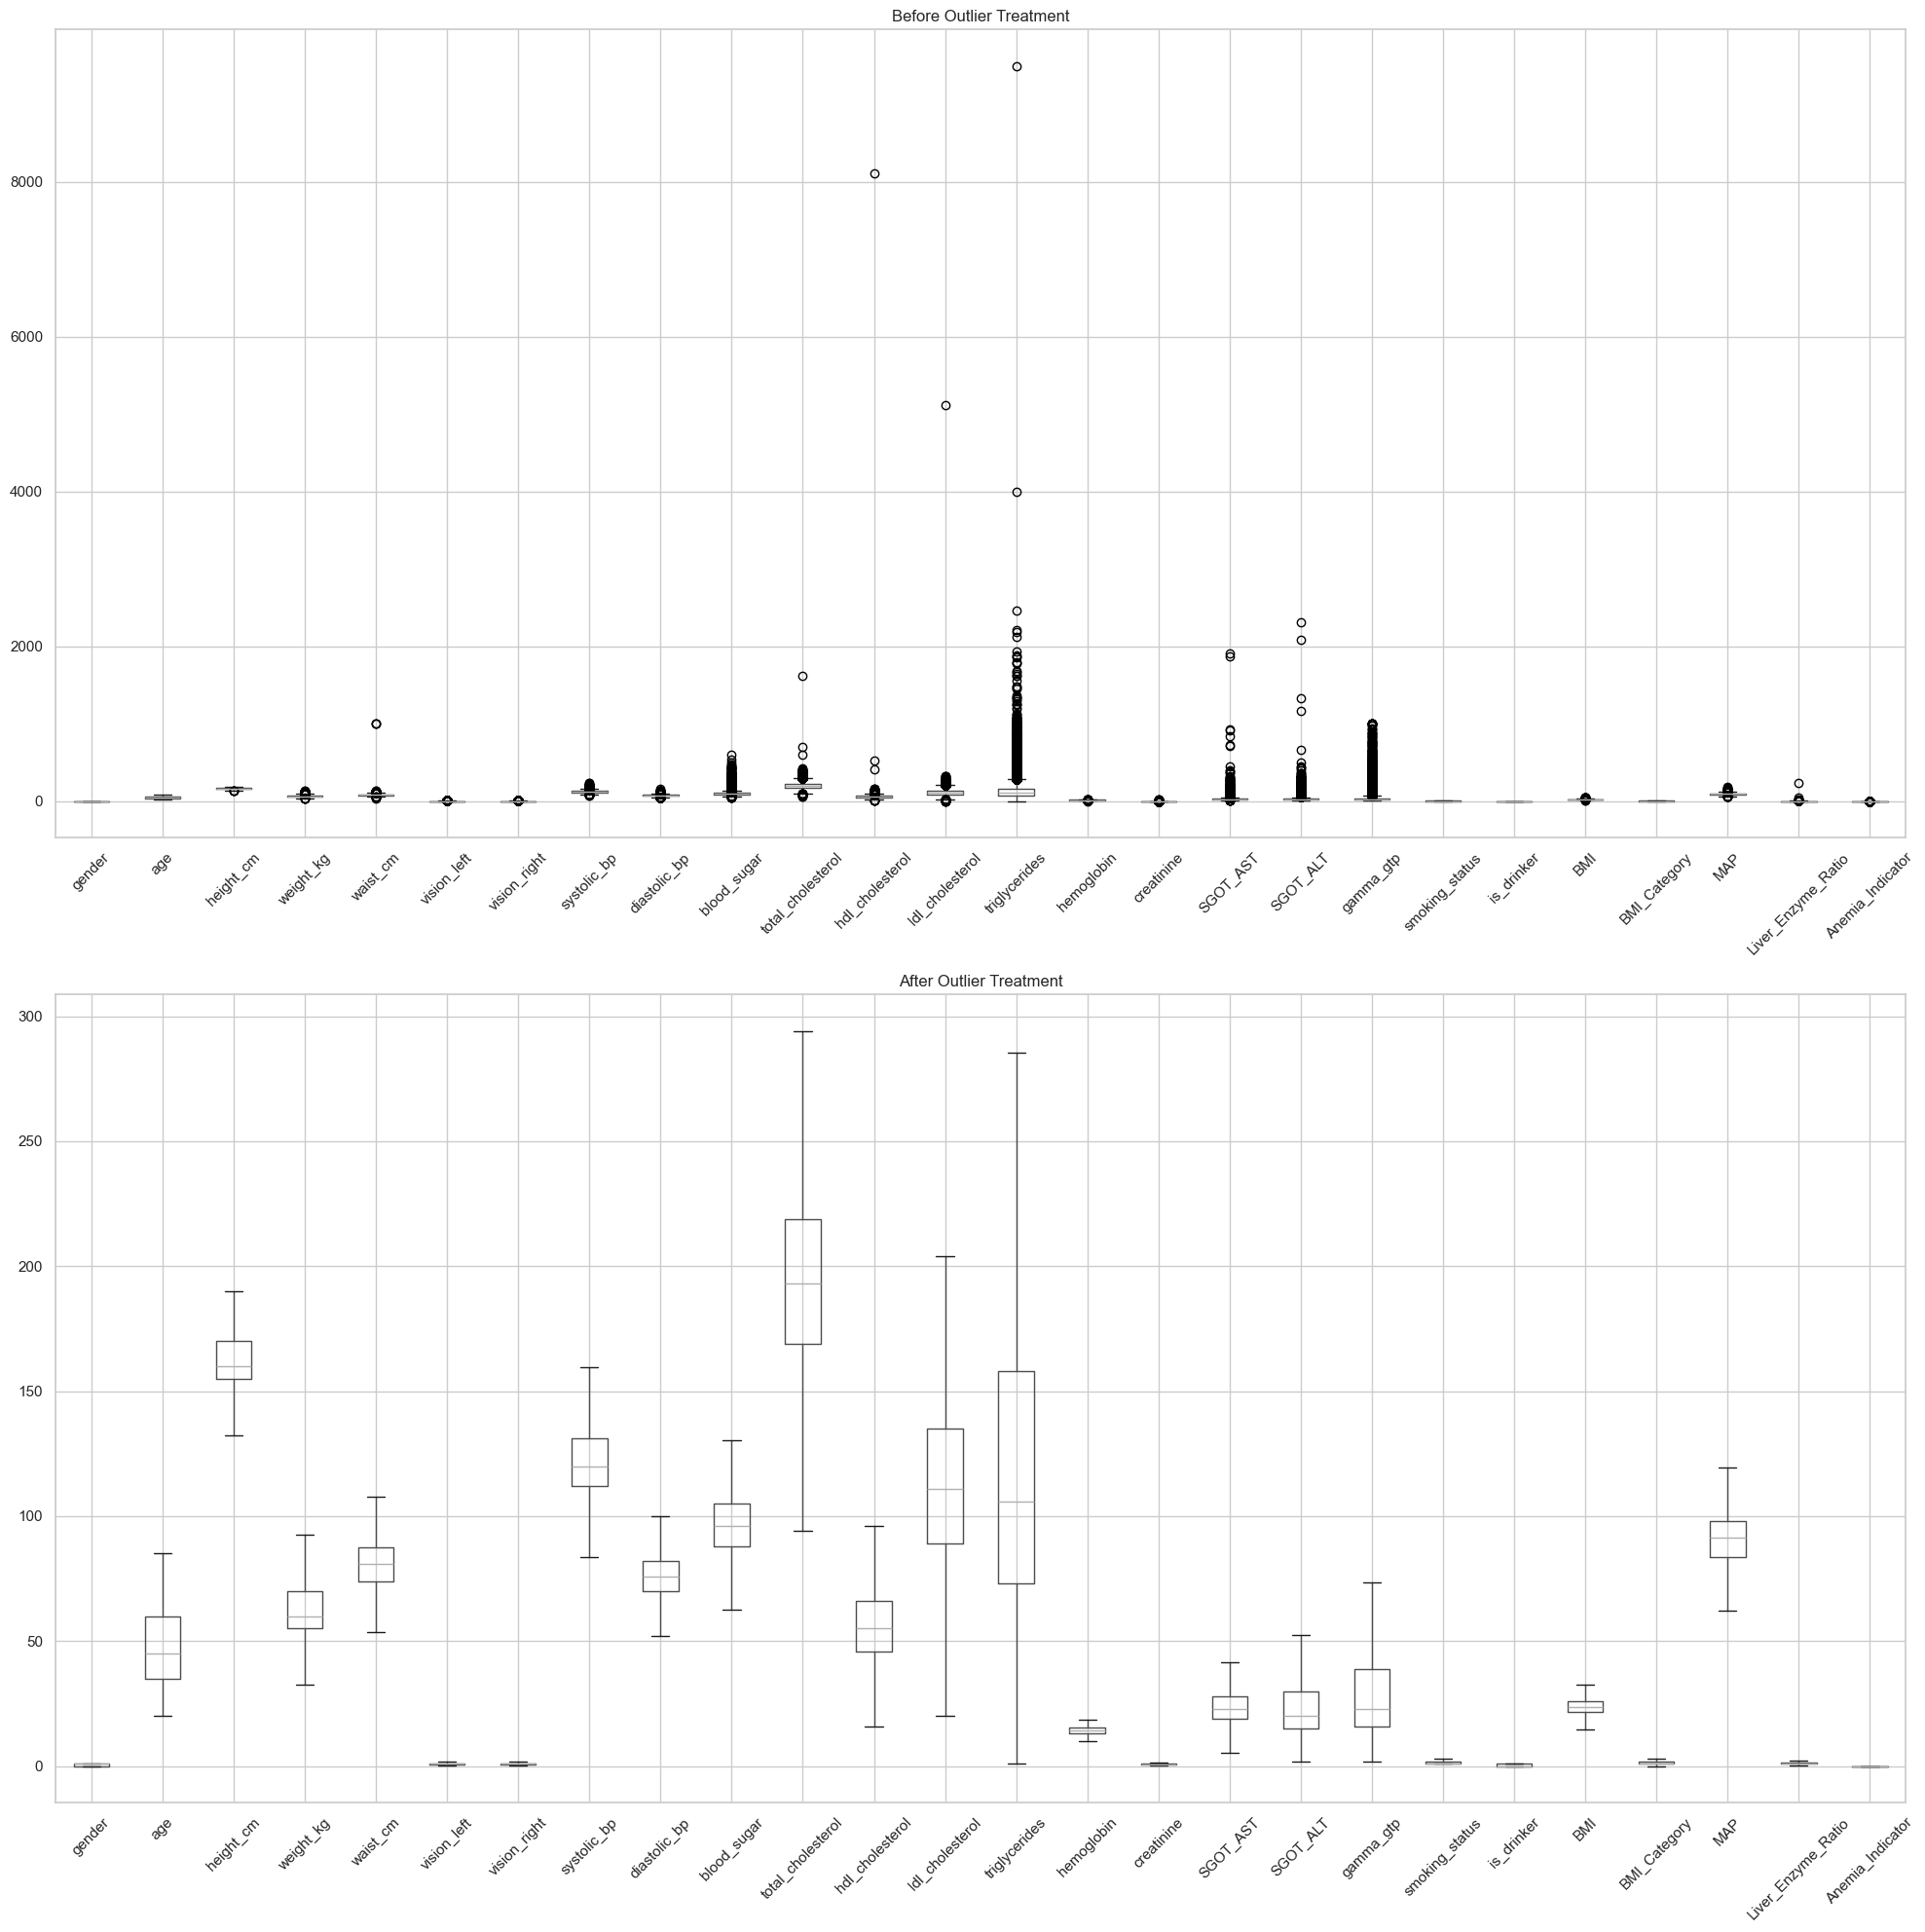

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Boxplot before
original_data.boxplot(ax=axes[0])
axes[0].set_title("Before Outlier Treatment")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot after
dataset.boxplot(ax=axes[1])
axes[1].set_title("After Outlier Treatment")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Train-Test Spilit**

In [66]:
X = dataset.drop('is_drinker', axis=1)
Y = dataset['is_drinker']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
print(X.shape, X_train.shape, X_test.shape)

(49999, 25) (39999, 25) (10000, 25)


In [69]:
print(Y.shape, Y_train.shape, Y_test.shape)

(49999,) (39999,) (10000,)


### **Data Standardization**

In [70]:
scalor = StandardScaler()

In [71]:
X_train = scalor.fit_transform(X_train)
X_test = scalor.transform(X_test)

### **Logestic Regression**

In [72]:
# Create Logistic Regression model with optimized parameters
lr = LogisticRegression(solver='lbfgs', max_iter=100, C=10.0)

In [73]:
lr.fit(X_train, Y_train)

LogisticRegression(C=10.0)

In [74]:
# Model Prediction
lr_X_train_prediction = lr.predict(X_train)
lr_X_test_prediction = lr.predict(X_test)

In [75]:
# Accuracy Scores
lr_training_data_accuracy = accuracy_score(lr_X_train_prediction, Y_train)
lr_testing_data_accuracy = accuracy_score(lr_X_test_prediction, Y_test)

In [76]:
print('Accuracy on Training Data: ', lr_training_data_accuracy * 100)
print('Accuracy on Testing Data: ', lr_testing_data_accuracy * 100)

Accuracy on Training Data:  72.63181579539489
Accuracy on Testing Data:  72.82


In [77]:
classification_report_train = classification_report(Y_train, lr_X_train_prediction)
classification_report_test = classification_report(Y_test, lr_X_test_prediction)

print("\nClassification Report (Training Data):")
print(classification_report_train)
print("\nClassification Report (Testing Data):")
print(classification_report_test)


Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     20080
           1       0.73      0.72      0.72     19919

    accuracy                           0.73     39999
   macro avg       0.73      0.73      0.73     39999
weighted avg       0.73      0.73      0.73     39999


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      5046
           1       0.73      0.72      0.72      4954

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(LogisticRegression(), {
    'C': np.logspace(-3, 3, 10),  # Test values from 0.001 to 1000 on a logarithmic scale
    'solver': ['lbfgs', 'liblinear'],  # Optimization solvers
    'max_iter': [100, 200, 300] 
}, cv=5, return_train_score=False, n_iter=20, scoring='accuracy', random_state=42, verbose=1)

# Step 3: Fit the model
clf.fit(X_train, Y_train)

new = pd.DataFrame(clf.cv_results_)
new.sort_values(by='mean_test_score', ascending=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.159369,0.005948,0.000977,0.000020,liblinear,100,2.154435,"{'solver': 'liblinear', 'max_iter': 100, 'C': ...",0.725125,0.727375,0.726250,0.726000,0.724591,0.725868,0.000961,1
6,0.182880,0.019748,0.001178,0.000200,liblinear,200,2.154435,"{'solver': 'liblinear', 'max_iter': 200, 'C': ...",0.725125,0.727375,0.726250,0.726000,0.724591,0.725868,0.000961,1
9,0.169725,0.038356,0.001079,0.000144,liblinear,200,1000.000000,"{'solver': 'liblinear', 'max_iter': 200, 'C': ...",0.725125,0.727375,0.726375,0.726000,0.724341,0.725843,0.001042,3
3,0.210898,0.037680,0.001129,0.000070,liblinear,200,46.415888,"{'solver': 'liblinear', 'max_iter': 200, 'C': ...",0.725250,0.727375,0.726250,0.726000,0.724341,0.725843,0.001015,4
15,0.117901,0.005647,0.001116,0.000211,liblinear,300,0.021544,"{'solver': 'liblinear', 'max_iter': 300, 'C': ...",0.725000,0.726750,0.726000,0.727375,0.723715,0.725768,0.001296,5
4,0.150138,0.010764,0.001169,0.000162,liblinear,100,0.021544,"{'solver': 'liblinear', 'max_iter': 100, 'C': ...",0.725000,0.726750,0.726000,0.727375,0.723715,0.725768,0.001296,5
7,0.052228,0.008505,0.000973,0.000032,lbfgs,100,215.443469,"{'solver': 'lbfgs', 'max_iter': 100, 'C': 215....",0.724750,0.727250,0.726375,0.726125,0.724091,0.725718,0.001143,7
11,0.050605,0.006576,0.001026,0.000118,lbfgs,200,215.443469,"{'solver': 'lbfgs', 'max_iter': 200, 'C': 215....",0.724750,0.727250,0.726375,0.726125,0.724091,0.725718,0.001143,7
14,0.051167,0.006887,0.001153,0.000266,lbfgs,300,215.443469,"{'solver': 'lbfgs', 'max_iter': 300, 'C': 215....",0.724750,0.727250,0.726375,0.726125,0.724091,0.725718,0.001143,7
5,0.057441,0.005558,0.001081,0.000215,lbfgs,100,1000.000000,"{'solver': 'lbfgs', 'max_iter': 100, 'C': 1000.0}",0.724750,0.727250,0.726375,0.726125,0.724091,0.725718,0.001143,7


## **Random Forest**

In [79]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=15, min_samples_leaf=3,
                            max_features='log2', max_depth=10, bootstrap=True, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=3,
                       min_samples_split=15, n_estimators=400, random_state=42)

In [80]:
rf_X_train_prediction = rf.predict(X_train)
rf_prediction_X_test = rf.predict(X_test)

In [81]:
rf_testing_data_accuracy = accuracy_score(rf_prediction_X_test, Y_test)
rf_training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)

In [82]:
print('Accuracy on Training Data: ', rf_training_data_accuracy * 100) 
print('Accuracy on Testing Data: ', rf_testing_data_accuracy * 100)

Accuracy on Training Data:  77.28693217330434
Accuracy on Testing Data:  72.71


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(RandomForestClassifier(), {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'bootstrap': [True, False]  # Whether to use bootstrapped samples

}, cv=5,n_iter=20, n_jobs=-1, scoring='accuracy', verbose=1, random_state=42)
clf.fit(X_train, Y_train)
clf.cv_results_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'mean_fit_time': array([1.60649495e+01, 6.63546410e+00, 5.74137383e+01, 8.08228312e+00,
        6.80332184e-03, 4.07105949e+01, 1.20734916e+01, 1.72896368e+01,
        6.87293406e+00, 1.25428309e+01, 7.63592701e+00, 8.48622322e-03,
        5.37790876e+01, 8.17918777e-03, 7.45406151e-03, 1.10555932e+01,
        2.18349082e+01, 1.14831696e+01, 5.42032361e+00, 2.13580251e+00]),
 'std_fit_time': array([4.84414282e-01, 2.20306480e-01, 1.00209789e+00, 3.89748147e-01,
        1.28480974e-04, 7.07046061e-01, 4.19624631e-01, 4.25455172e-01,
        2.59702493e-01, 5.30695441e-01, 2.58869605e-01, 8.06332951e-04,
        5.76885388e-01, 1.14521500e-03, 3.87943225e-04, 2.73181670e-01,
        3.13510669e-01, 2.76864801e-01, 9.59562941e-02, 7.18526605e-02]),
 'mean_score_time': array([0.40570693, 0.13262291, 1.158571  , 0.18855739, 0.        ,
        1.12502632, 0.22048278, 0.37885756, 0.11697898, 0.23391633,
        0.16814699, 0.        , 0.65029287, 0.        , 0.        ,
        0.19453545, 

In [ ]:
new = pd.DataFrame(clf.cv_results_)
new.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,53.779088,0.576885,0.650293,0.058348,500,5,2,log2,20,False,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.729125,0.725250,0.729875,0.727875,0.726591,0.727743,0.001674,1
5,40.710595,0.707046,1.125026,0.186382,500,10,1,log2,30,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.726500,0.723750,0.728250,0.731500,0.725341,0.727068,0.002659,2
2,57.413738,1.002098,1.158571,0.180342,500,10,2,log2,20,False,"{'n_estimators': 500, 'min_samples_split': 10,...",0.728375,0.723625,0.727625,0.727750,0.723590,0.726193,0.002126,3
15,11.055593,0.273182,0.194535,0.029542,100,2,4,log2,30,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.724750,0.726500,0.729125,0.727500,0.722465,0.726068,0.002293,4
7,17.289637,0.425455,0.378858,0.066475,200,10,1,log2,30,True,"{'n_estimators': 200, 'min_samples_split': 10,...",0.726125,0.726000,0.726375,0.726625,0.723840,0.725793,0.001000,5
10,7.635927,0.258870,0.168147,0.004389,100,10,4,sqrt,None,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.727375,0.720250,0.728625,0.728875,0.723465,0.725718,0.003351,6
0,16.064949,0.484414,0.405707,0.075620,200,5,2,log2,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.725875,0.725375,0.727125,0.727000,0.722715,0.725618,0.001596,7
3,8.082283,0.389748,0.188557,0.034862,100,10,2,log2,30,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.729500,0.720500,0.728125,0.726250,0.722715,0.725418,0.003352,8
6,12.073492,0.419625,0.220483,0.028899,100,5,2,sqrt,20,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.725000,0.724375,0.725625,0.724500,0.721965,0.724293,0.001244,9
17,11.483170,0.276865,0.230956,0.035557,100,10,2,log2,None,False,"{'n_estimators': 100, 'min_samples_split': 10,...",0.725125,0.720000,0.722000,0.729375,0.724716,0.724243,0.003174,10


## **Support Vector Machines**

In [83]:
svc = SVC()

In [84]:
svc.fit(X_train, Y_train)

SVC()

In [85]:
svc_X_train_prediction = svc.predict(X_train)
svc_training_data_accuracy = accuracy_score(svc_X_train_prediction, Y_train)

In [86]:
svc_X_test_prediction = svc.predict(X_test)
svc_testing_data_accuracy = accuracy_score(svc_X_test_prediction, Y_test)

In [87]:
print('Accuracy on Training Data: ', svc_training_data_accuracy * 100)
print('Accuracy on Testing Data: ', svc_testing_data_accuracy * 100)

Accuracy on Training Data:  74.92937323433085
Accuracy on Testing Data:  73.47


## **XGBoost**

In [ ]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees
    'max_depth': [3, 5, 10, 15],  # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used at each split
    'gamma': [0, 1, 5],  # Minimum loss reduction
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed for a child
}

# Create the RandomizedSearchCV object
clf = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Avoid label encoding warnings
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    random_state=42,  # Random seed
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
clf.fit(X_train, Y_train)

# View the best parameters and results
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}
Best Score: 0.7306932397799726


In [89]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier(subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=5, 
                           learning_rate= 0.05, gamma=5, colsample_bytree=0.8)

# Train the model
xg_clf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = xg_clf.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(Y_train, xg_clf.predict(X_train))

# Calculate testing accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)

# Display both training and testing accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Display classification report and confusion matrix for testing data
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Training Accuracy: 75.25%
Testing Accuracy: 73.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5046
           1       0.73      0.75      0.74      4954

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000


Confusion Matrix:
[[3681 1365]
 [1261 3693]]


## **Gradient Boosting Classifier**

### **Hyperparameter Tuning**

In [90]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of boosting stages
    'max_depth': [3, 5, 10],  # Maximum depth of the individual estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate shrinks contribution of each tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting individual base learners
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for split
}

# Create the RandomizedSearchCV object
clf = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    random_state=42,  # Random seed
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
clf.fit(X_train, Y_train)

# View the best parameters and results
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [91]:
# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(subsample=0.8, n_estimators=500, min_samples_split=10, min_samples_leaf=4, max_features=None, learning_rate=0.05, )

# Train the model
gb_clf.fit(X_train, Y_train)

# Predict the labels for the training set and test set
gb_clf_train_pred = gb_clf.predict(X_train)
gb_clf_test_pred = gb_clf.predict(X_test)

# Evaluate training and testing accuracy
train_accuracy = accuracy_score(Y_train, gb_clf_train_pred)
test_accuracy = accuracy_score(Y_test, gb_clf_test_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Display classification report and confusion matrix for the test set
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, gb_clf_test_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, gb_clf_test_pred))

Training Accuracy: 75.07%
Testing Accuracy: 73.77%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      5046
           1       0.73      0.74      0.74      4954

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000


Confusion Matrix (Test Data):
[[3687 1359]
 [1264 3690]]


### **Pipeline**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define the base models
lr = LogisticRegression(solver='lbfgs', max_iter=100, C=10.0, random_state=42)
rf = RandomForestClassifier(
    n_estimators=400, min_samples_split=15, min_samples_leaf=3,
    max_features='log2', max_depth=10, bootstrap=True, random_state=42
)
svc = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('rf', rf)],
    final_estimator=LogisticRegression(solver='lbfgs', max_iter=200, random_state=42),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Pipeline with preprocessing and stacking
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for SVC and Logistic Regression
    ('stacking', stacking)         # Stacking model as the final step
])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Evaluate the pipeline using cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean() * 100:.2f}%")

# Predict on the testing data
y_pred = pipeline.predict(X_train)
y_pred1 = pipeline.predict(X_test)
train_accuracy = accuracy_score(Y_train, y_pred)
test_accuracy = accuracy_score(Y_test, y_pred1)
print(f"Test Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


KeyboardInterrupt: 

In [ ]:
input_data = (1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = my_scaler.transform(input_data_reshaped)


prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not Drinking')
else:
  print('The person is Drinking')